## Regresión Lineal: Predicción de Precios de Viviendas en Bolivia

**Teoría**:  
La regresión lineal modela la relación entre una variable dependiente (Y) y una o más variables independientes (X) mediante una línea recta.  

## Ecuación del Modelo  
Para *una variable*:  
$$ Y = beta_0 + beta_1 X + epsilon $$  
- $\\beta_0$: Intercepto (valor de Y cuando X = 0).  
- $\\beta_1$: Pendiente (cambio en Y por unidad de X).  
- $\\epsilon$: Error aleatorio.  

Para *múltiples variables*:  
$$ Y = beta_0 + beta_1 X_1 + beta_2 X_2 + ... + beta_n X_n + epsilon $$  

## Supuestos Clave  
1. **Linealidad**: Relación lineal entre X e Y.  
2. **Independencia**: Observaciones no correlacionadas entre sí.  
3. **Homocedasticidad**: Varianza constante del error.  
4. **Normalidad**: Los residuos (errores) siguen una distribución normal.

## Métrica de Evaluación  
- **MSE (Error Cuadrático Medio)**:  
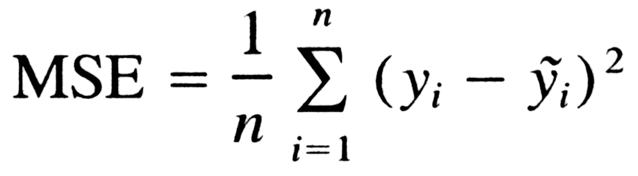
- **R² (Coeficiente de Determinación)**:  
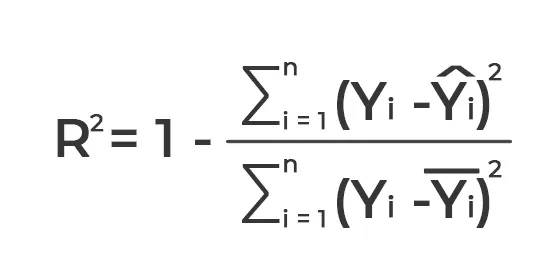

Interpretación: % de variabilidad de Y explicada por el modelo (0% = inútil, 100% = perfecto).

# --- Carga de Datos Locales

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/AlbertJQM/Ejemplo-UMSA/refs/heads/main/datos/precios_viviendas_bolivia.csv"
datos = pd.read_csv(url)
print("Columnas del dataset:", datos.columns.tolist())

# --- Preprocesamiento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Ejercicio Guiado 1: Manejo de valores faltantes
datos = datos.dropna()  # ¡Los estudiantes deben justificar esta decisión!

In [ ]:
# Separar características (X) y target (y)
X = datos[['metros_cuadrados', 'num_habitaciones', 'distancia_centro']]
y = datos['precio_usd']

In [ ]:
# Ejercicio Guiado 2: Estandarización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # ¡Los estudiantes deben probar sin escalar!

In [ ]:
# Split datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# --- Modelado

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# --- Evaluación

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f} | R²: {r2:.2f}")

# --- Visualización

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Precio Real (USD)")
plt.ylabel("Precio Predicho (USD)")
plt.title("Regresión Lineal: Predicciones vs. Reales")
plt.show()